In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [48]:
df = pd.read_csv("F:\codegnan\projects\mail_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\91949\AppData\Local\Temp\ipykernel_7860\3818420488.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("F:\codegnan\projects\mail_data.csv")


In [49]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [50]:
data = df.where((pd.notnull(df)), '')

In [51]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [53]:
data.shape

(5572, 2)

In [54]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category', ] =1

In [55]:
X = data ['Message']
Y = data ['Category']

In [56]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [57]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [58]:
#Splitting the data set into testing and training

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [59]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [60]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [61]:
# Feature extraction of a data sets.
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')



In [62]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [63]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train_features, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)


In [67]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [68]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [69]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


In [70]:
# input_your_mail = ["This is the 2nd time we have tried to contact You. You have won the AE400 prize.To claim easy,just call 09866079767 NOW! Only 10p per minute. BT -natinal -rate"]
# input_your_mail = ["Well obviously not because all the people in my cool college life went home;_;"]
input_your_mail = [" You've been selected to stay in 1 of 250 top British hotels - FOR NOTHING! Holiday valued at AE350! Dial 0879896607976701 to claim - National Rate Call. Bx526, SW735s"]

input_data_features = feature_extraction.transform(input_your_mail)

prediction = model.predict(input_data_features)

print(prediction)

if (prediction[0] == 1):
    print("Ham Mail")
else:
    print("Spam Mail")
    

[0]
Spam Mail


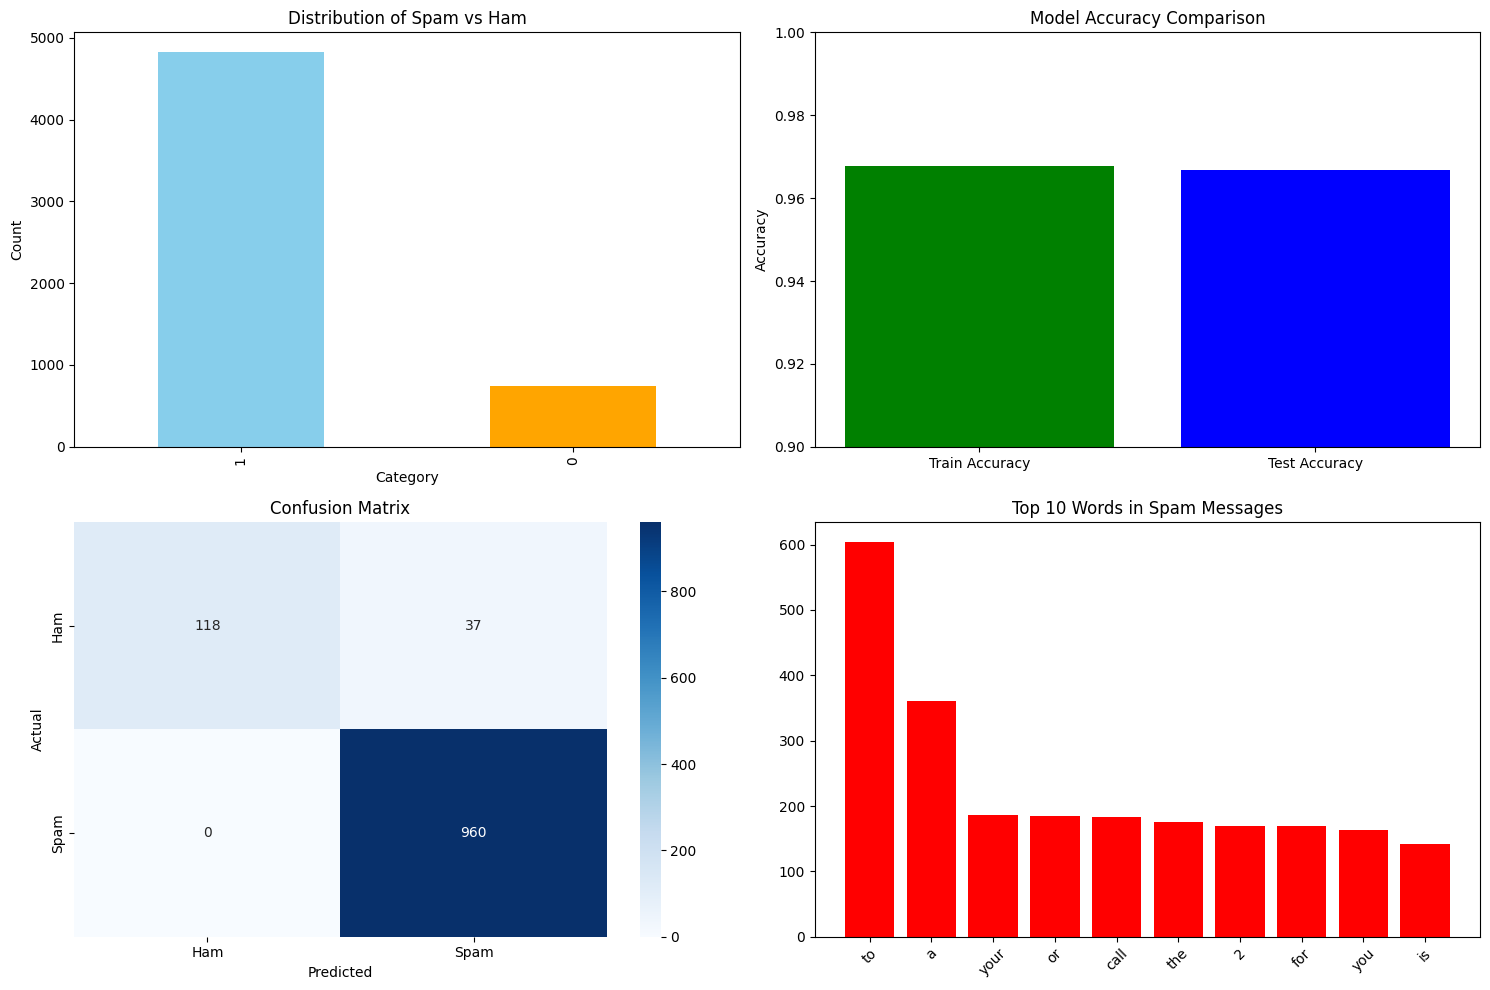

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

# --------------------------
# 1. Distribution of Spam vs Ham
# --------------------------
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
data['Category'].value_counts().plot(kind='bar', color=['skyblue','orange'])
plt.title("Distribution of Spam vs Ham")
plt.xlabel("Category")
plt.ylabel("Count")

# --------------------------
# 2. Training vs Test Accuracy
# --------------------------
plt.subplot(2,2,2)
acc_train = accuracy_on_training_data
acc_test = accuracy_on_test_data
plt.bar(['Train Accuracy','Test Accuracy'], [acc_train, acc_test], color=['green','blue'])
plt.ylim(0.9,1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

# --------------------------
# 3. Confusion Matrix
# --------------------------
plt.subplot(2,2,3)
y_pred = model.predict(X_test_features)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# --------------------------
# 4. Word Frequency (Spam)
# --------------------------
plt.subplot(2,2,4)
spam_words = ' '.join(data[data['Category']==0]['Message']).split()
spam_common = Counter(spam_words).most_common(10)
plt.bar([x[0] for x in spam_common], [x[1] for x in spam_common], color='red')
plt.title("Top 10 Words in Spam Messages")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
